<a href="https://colab.research.google.com/github/grojasc/MIA/blob/main/Tarea2_IMT3850_GR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


1- (10 puntos) Variables aleatorias
Muestre que si X e Y son variables aleatorias independientes, entonces:


Var[X + Y ] = Var[X] + Var[Y ].



R: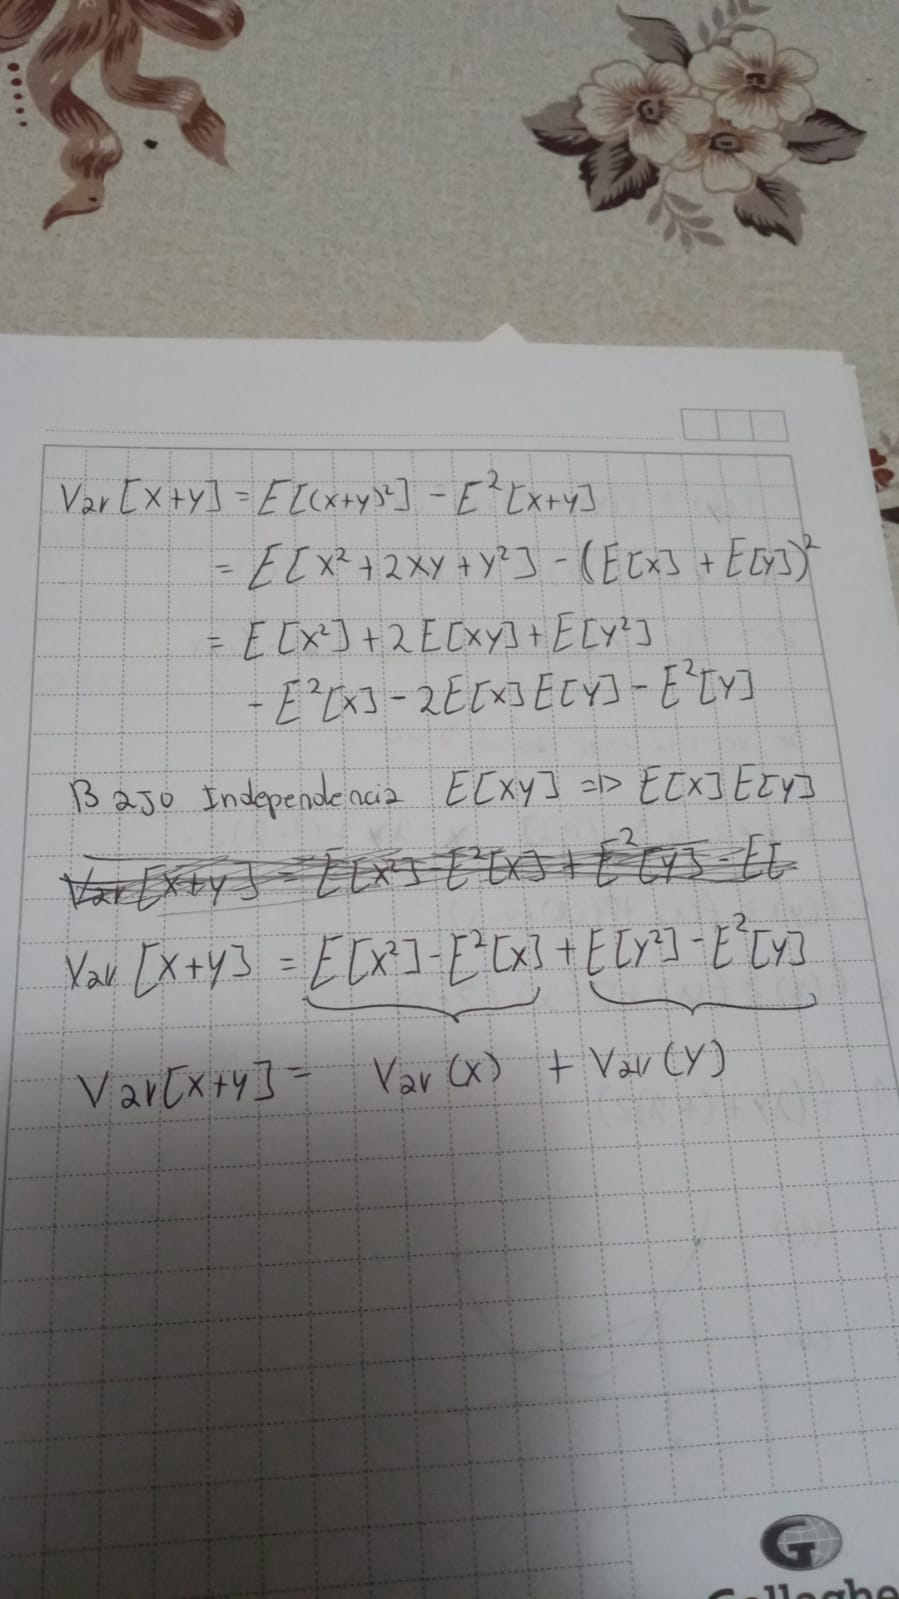


# 2- Quicksort

Algoritmo Random Quicksort.
En clases observamos que el número esperado de comparaciones realizadas por el algoritmo Quicksort
Aleatorio es de 2nln(n) + O(n), donde n es el largo de la lista S. El objetivo es testear este resultado.
Para esto:

a) Programe el algoritmo Quicksort con pivot aleatorio presentado en clases para ordenar de forma
ascendente una lista S de números reales distintos. Corrobore que su algoritmo funciona mostrando
la lista ordenada S = [0, 5, 4, 1, 7, 6, 3, 2, 8, 9].

b) Para largo de lista n fijo, obtenga lista aleatorias y aplique el algoritmo a cada una de ellas calculando
el numero de comparaciones realizadas en el algoritmo. Calcule el promedio de estas para n fijo.

c) Repite el procedimiento anterior para n = [100, 200, 300, ..., 5000] y graque n vs. el promedio de
comparaciones para cada n. Ademas graque las curvas correspondientes a y = 2nln(n) y y = 2n.

d) Explique porque los resultados del experimento corroboran los resultados teóricos.


In [3]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import axes3d
from sklearn.linear_model import LinearRegression
import matplotlib as mp
import numpy as np
import random
from numpy import genfromtxt 
import pandas as pd




In [ ]:
#a) Quicksort con una lista definida y pivot aleatorio

S = [0, 5, 4, 1, 7, 6, 3, 2, 8, 9]
ListaOrdenada= ['' for i in range(len(S))]

#Sr =[random.randint(1,10000) for i in range(100000)]

def QuickSort( S, ListaOrdenada,index):
    if len(S)==0:
        return ListaOrdenada
    RList = []; LList =[]
    pivot = random.choice(S)
    #print(pivot)
    S.remove(pivot)
    for i in S:
        if i>pivot:
            RList.append(i)
        else:
            LList.append(i)
                        
    ListaOrdenada[index+len(LList)]= pivot
    QuickSort(RList, ListaOrdenada, index+len(LList)+1)
    QuickSort(LList,ListaOrdenada,index)
    return ListaOrdenada

ans = QuickSort(S, ListaOrdenada,0)
print(ans)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [ ]:

# n fijo N= 100 iteraciones ver promedio de comparasiones

n = 100 #random.randint(1,1000)
N = 100
#Sr =[random.randint(1,10) for i in range(n)]
#ListaOrdenada= ['' for i in range(len(Sr))]
#print(f'Lista incial: ',Sr)

def Average(lst):
  return sum(lst) / len(lst)

def QuickSort( S, ListaOrdenada,index):
    global ci
    if len(S)==0:
        return ListaOrdenada
    RList = []; LList =[]
    pivot = random.choice(S)
      #print(pivot)
    S.remove(pivot)
    for i in S:
      if i>pivot:
        RList.append(i)
        ci += 1
      else:
        LList.append(i)
        ci += 1
    #print(ci,ListaOrdenada) 
    ListaOrdenada[index+len(LList)]= pivot
    QuickSort(RList, ListaOrdenada, index+len(LList)+1)
    QuickSort(LList,ListaOrdenada,index)
    return ListaOrdenada,ci

#ans = QuickSort(Sr, ListaOrdenada,0)
#print(ans)
Comparisons = []
#endTimes = []

#val1 = QuickSort(Sr,ListaOrdenada, 0)
#print(f'Lista incial ordenada: ',val1[0])
#listafinal = val1[0]
ci = 0
for i in range(N):
    Sr =[random.randint(1,10000) for i in range(n)]
    ListaOrdenada= ['' for i in range(len(Sr))]
    #start=time.time()
    
    val = QuickSort(Sr,ListaOrdenada, 0)
    Comparisons.append(val[1])
    ci = 0

    #end= time.time()
    #endTimes.append(end-start)


print(f'Lista de comparisons : ',Comparisons)

print(f'Promedio comaparisons: ',Average(Comparisons))

Lista de comparisons :  [719, 635, 720, 688, 602, 759, 691, 586, 684, 673, 634, 592, 591, 749, 577, 711, 741, 609, 670, 589, 706, 674, 624, 588, 615, 738, 628, 613, 698, 647, 615, 707, 632, 838, 652, 707, 630, 622, 654, 607, 662, 738, 619, 619, 658, 687, 582, 676, 876, 651, 736, 647, 593, 633, 556, 640, 628, 740, 554, 669, 657, 603, 772, 638, 701, 656, 642, 575, 585, 592, 640, 748, 651, 618, 672, 724, 670, 632, 574, 636, 638, 738, 615, 631, 557, 572, 646, 723, 698, 702, 640, 614, 695, 572, 676, 542, 635, 670, 625, 594]
Promedio comaparisons:  653.48


[642.44, 1557.76, 2614.46, 3633.39, 4766.45, 6027.17, 7256.93, 8490.93, 9745.2, 11008.33, 12257.35, 13489.81, 14868.04, 16270.16, 17658.6, 19203.41, 20343.6, 21780.89, 23252.57, 24825.72, 26246.38, 27736.67, 28966.95, 30453.9, 31947.68, 33776.12, 34857.69, 36677.14, 38134.66, 39620.67, 40979.41, 42637.88, 43999.47, 45848.44, 47030.72, 49139.22, 50167.69, 52208.96, 53395.21, 55116.65, 56740.83, 58365.23, 59578.07, 61128.83, 63068.27, 64703.03, 66278.72, 67933.99, 69288.1]


<function matplotlib.pyplot.show>

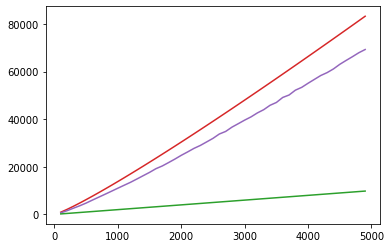

In [ ]:
# c) distintas listas y distintos n:
Input= [i for i in range(100,5000,100)]
N = 100
avg_comparisons = []
for i in Input:
  ci = 0
  sum_comparisons = 0
  for j in range(N):
    #print(i)
    Sr =[random.randint(1,10000) for i in range(i)]
    ListaOrdenada= ['' for k in range(len(Sr))]
    val = QuickSort(Sr,ListaOrdenada, 0)
    #Comparisons.append(val[1])
    sum_comparisons += val[1]
    ci = 0
  avg_comparisons.append(sum_comparisons/N) 

print(avg_comparisons)
n = Input  
   

plt.plot(n,2*np.asarray(n)*np.log(np.asarray(n)),'C03')
plt.plot(n,avg_comparisons,'C04')
plt.plot(n,2*np.asarray(n),'C02')
plt.show

Ideal Case
In the ideal case we hope each partitioning step breaks the input in half. The "halves" probably won't be precisely equal, but if we choose the pivot well, they should be pretty close. To keep the math simple, let's assume perfect partitioning, so we get exact halves every time.

In this case, the number of times we can break it in half will be the base-2 logarithm of the number of inputs. For example, given 128 inputs, we get partition sizes of 64, 32, 16, 8, 4, 2, and 1. That's 7 levels of partitioning (and yes log2(128) = 7).

So, we have log(N) partitioning "levels", and each level has to visit all N inputs. So, log(N) levels times N operations per level gives us O(N log N) overall complexity.

Worst Case
Now let's revisit that assumption that each partitioning level will "break" the input precisely in half. Depending on how good a choice of partitioning element we make, we might not get precisely equal halves. So what's the worst that could happen? The worst case is a pivot that's actually the smallest or largest element in the input. In this case, we do an O(N) partitioning level, but instead of getting two halves of equal size, we've ended up with one partition of one element, and one partition of N-1 elements. If that happens for every level of partitioning, we obviously end up doing O(N) partitioning levels before even partition is down to one element.

This gives the technically correct big-O complexity for Quicksort (big-O officially refers to the upper bound on complexity). Since we have O(N) levels of partitioning, and each level requires O(N) steps, we end up with O(N * N) (i.e., O(N2)) complexity.

3- **Convexidad**

Sea f : R
d → R una función es diferenciable. Prube que f es una función convexa si y sólo si se satisface
f(y) ≥ f(x) + ∇f(x)
>(y − x)
para todo x, y en el dominio de f.

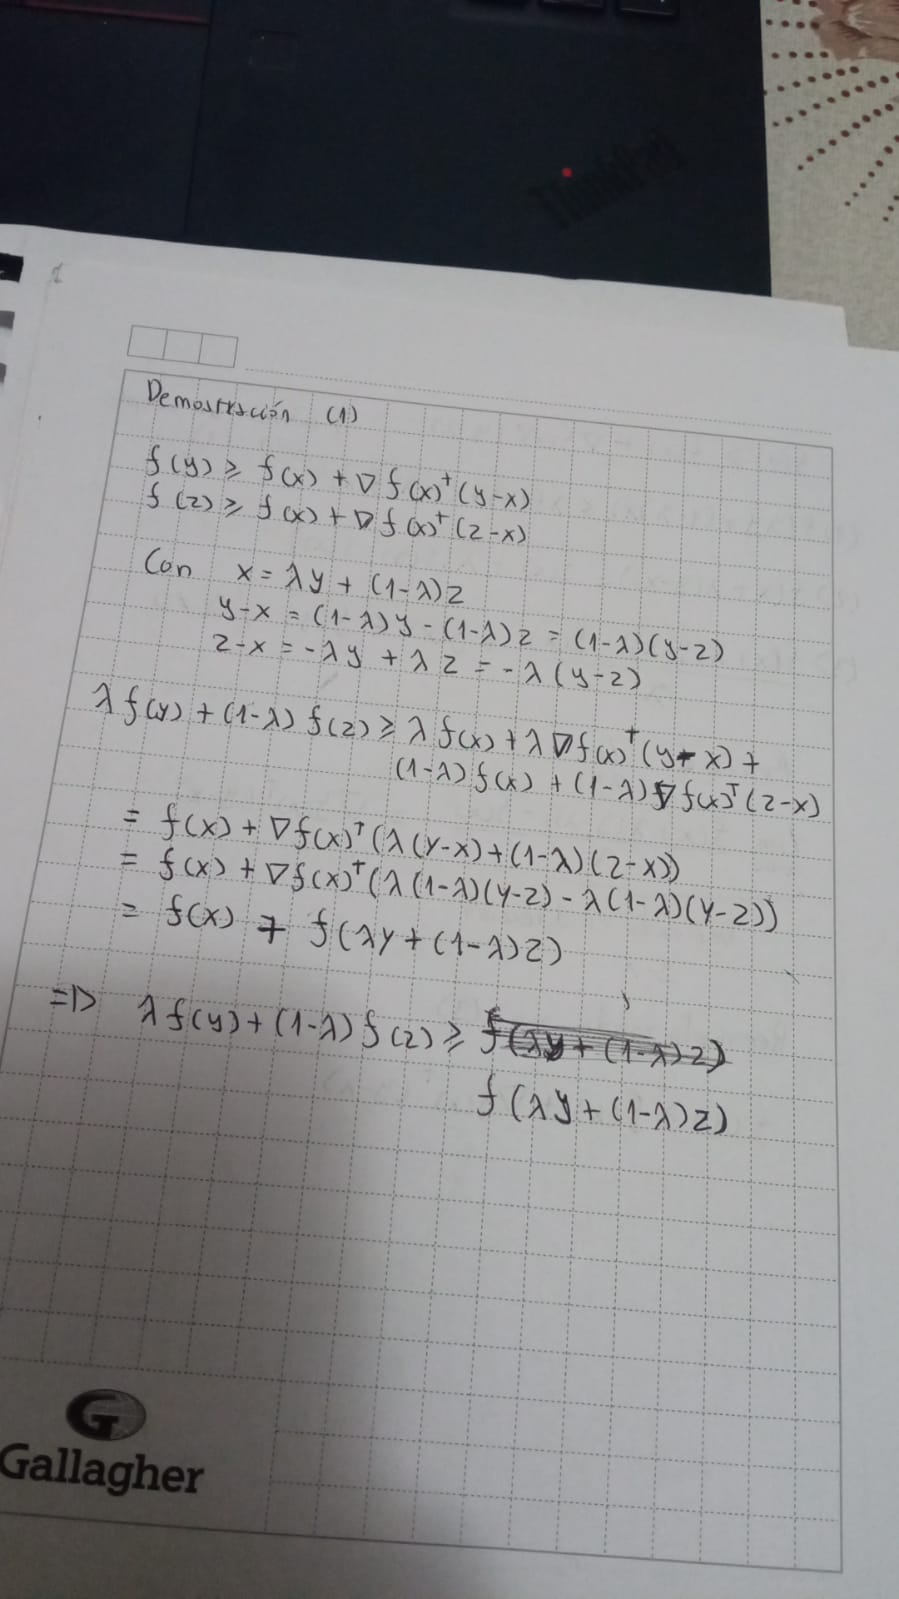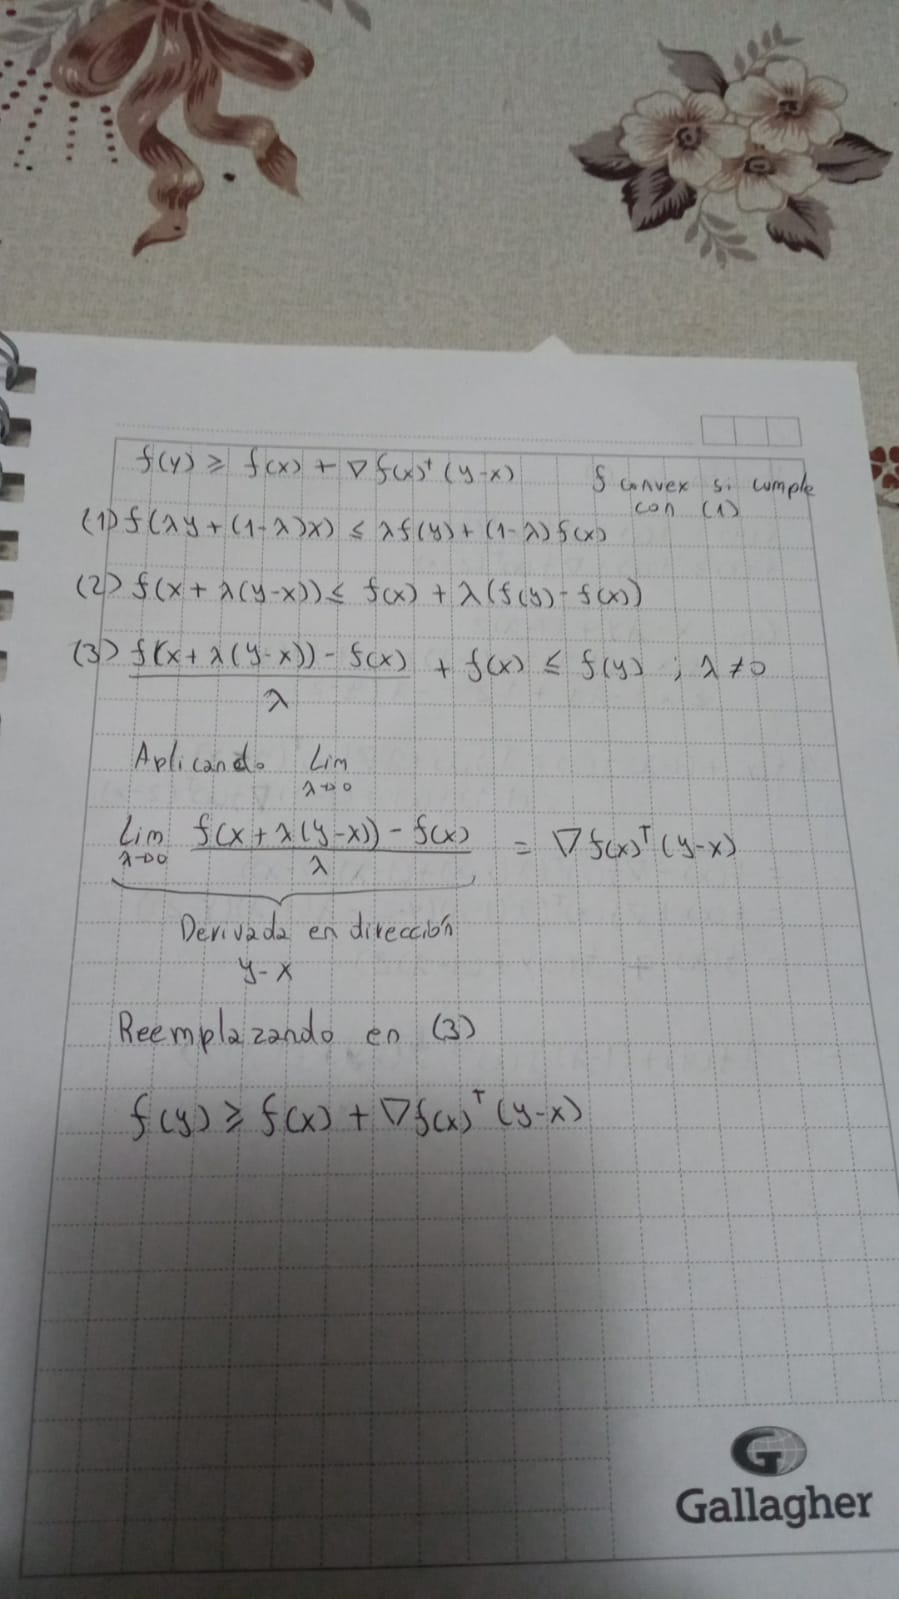

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


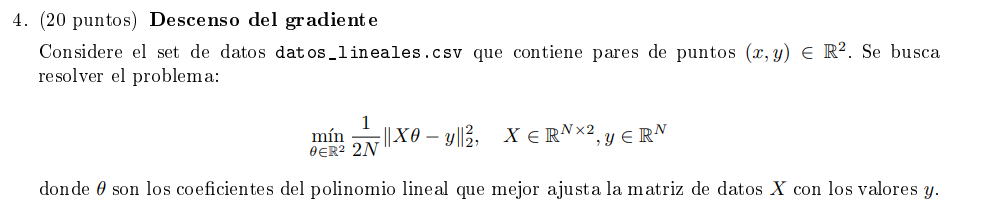

In [6]:
# carga de datos
#datos_lineales = genfromtxt('/content/datos_lineales.csv', delimiter=',',names=True)
#datos_cuadraticos = genfromtxt('/content/datos_cuadraticos.csv', delimiter=',',names=True)
#datos_lineales.dtype.names
#datos_cuadraticos.dtype.names
datos_lineales = pd.read_csv('/content/drive/MyDrive/MIA 2022/Fundamentos Matemáticos para IA/Tarea2/datos_lineales.csv')
datos_cuadraticos = pd.read_csv('/content/drive/MyDrive/MIA 2022/Fundamentos Matemáticos para IA/Tarea2/datos_cuadraticos.csv')


In [27]:
datos_lineales.head()
X = datos_lineales.x
y = datos_lineales.y
X.shape

(250,)

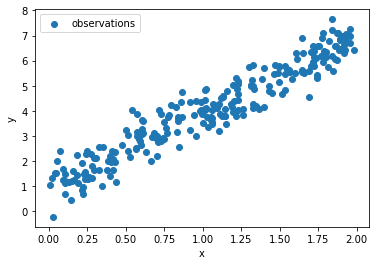

In [20]:
#%matplotlib notebook
plt.figure()
plt.scatter(X, y, label= 'observations')
#plt.plot(x,y,c='r',label='SG')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [65]:
# a) gradiente descendiente 
NITMAX = 100
gamma = 0
N = len(X)
def gradient_descent(X,y,NITMAX=100,theta = None,gamma=0.1):
    # condiciones iniciales
    theta = np.random.rand(2)
    loss = [] # np.zeros((NITMAX,1))
    past_loss = []
    past_thetas = [theta]
    #w = 10*np.random.randn()
    #b = 10*np.random.randn()
    #params = []
    
    for i in range(NITMAX):
        #theta.append([w,b])
        prediction = np.dot(np.array([1.0, X]),theta)
        #e = y - f(w,b) 
        error = prediction - y
        #loss[i] = loss_function(e)
        loss = 1/(2*N) * np.dot(error.T, error)
        #actualización de parametros
        past_loss.append(loss)
        theta = theta -(gamma*(1/N)*np.dot(X.T, error))
        past_thetas.append(theta)
        #w_new = w - gamma*dL_dw(e,w,b)
        #b_new = b - gamma*dL_db(e,w,b)
        #w = w_new
        #b = b_new
        
    return past_thetas, past_loss
        
A, B = gradient_descent(X,y,NITMAX=100,theta = None,gamma=0.1)
theta = A[-1]
print("Gradient Descent: {:.2f}, {:.2f}".format(theta[0], theta[1]))

Gradient Descent: 2.19, 2.07


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


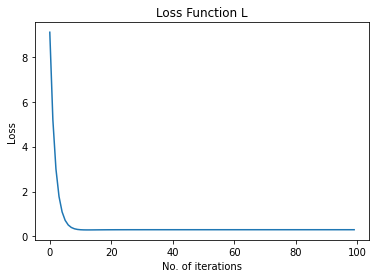

In [67]:
#Plot the cost function...
plt.title('Loss Function L')
plt.xlabel('No. of iterations')
plt.ylabel('Loss')
plt.plot(B)
plt.show()

In [ ]:
MAXITER = 1000
TOL = 1e-6
def grad_iter_step(f,gradf,x0, MAXITER = 1000, TOL = 1e-6):
  iter = 0 
  xi = x0.copy()
  gamma_i = 1
  error = 1.
  while error  >TOL and iter < MAXITER:
      xnew = xi - gamma_i*gradf(xi)
      if f(xnew) > f(xi):
        gamma_i = gamma_i/2
      else:
        error = np.linalg.norm(xnew-xi)
        xi = xnew
        iter +=1
  return xi, iter


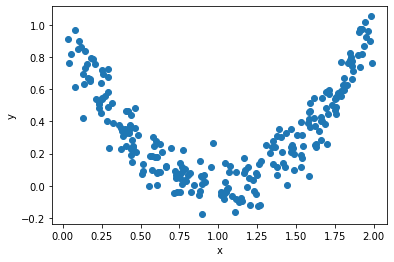

In [20]:
#%matplotlib notebook
plt.figure()
plt.scatter(X_2.x, X_2.y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
MAXITER = 1000
TOL = 1e-6
def gad_desct_iter(f,gradf,x0):
  iter = 0 
  xi = x0.copy()
  gamma_i = 0.01
  error = 1.
  while error  >TOL and iter < MAXITER:
      xnew = xi - gamma_i*gradf(xi)
      error = np.linalg.norm(xnew-xi)
      xi = xnew
      iter +=1
  return xi, iter


In [ ]:
# return (1.0/N)*np.linalg.norm(X.dot(theta)-y)**2
N = 200
x = np.linspace(0,N,N)
def grad_loss(theta,x,y):
  N = x.size
  X = NP.ZEROS((N,2 , dtype= np.float64)
  X[:,0] = np.ones(N)
  X[:,1] = x[:]
  return (2.0/N)*X.T.dot(X.dot(theta)-y)

('index', 'x', 'y')

# 5- ** Mediana Aleatoria **

In [ ]:
# inicio
n = 15
N = 100

S = [random.randint(1,100) for i in range(n)]
print(S)
def randomized_median(S,n):
  
  u = []
  d = []
  median = 0
  #calculo de la lista R
  r = int(np.ceil(n**(3/4)))
  R = random.choices(S, k = r)

  #Ordenar lista R con quicksort
  ListaOrdenada= ['' for i in range(len(R))]
  Rsort = QuickSort(R, ListaOrdenada,0)

  #Cálculo de d y u
  di = int(np.ceil(((n**(3/4))/2)-(n**(1/2)))) 
  ui = int(np.floor(((n**(3/4))/2)+(n**(1/2)))) -1
  #print(S,Rsort,len(Rsort), di, ui)
  d.append(Rsort[di])
  u.append(Rsort[ui])
  #print(d,u)
  # Removemos valores de d y u encontrados de S.  
  C = []
  S.remove(u[0])
  S.remove(d[0])
  #print(S)
  #Crear listas con los valores por rango d, C, u
  for i in range(len(S)):
    if (S[i]>d[0]) and (S[i]< u[0]):
      C.append(S[i])
    elif S[i] < d[0]:
      d.append(S[i])
    else:
      u.append(S[i])
  #definir los indices lu, ld
  lu = len(u)
  ld = len(d)
  #validar las condiciones de la mediana
  if (ld > n/2) or (lu > n/2):
    result = False 
  if len(C)  <= 4*n**(3/4):
    ListaOrdenada1= ['' for i in range(len(C))]
    Csort = QuickSort(C, ListaOrdenada1,0)
    value = int(np.ceil(((n/2) -ld +1)))-1
    #print(Csort)
    #print(value)
    if len(Csort) > value:
      result = True
      median = Csort[value]
    else:
      result = False
  else:
    result = False
  return C,ld,lu,median,result

ans = randomized_median(S,n)

print('median:',ans[3])
print('Resultado:',ans[4])
#print(d,C,u,result,median)

[7, 93, 47, 75, 30, 93, 67, 89, 38, 11, 62, 50, 28, 23, 5]
median: 50
Resultado: True


In [ ]:
# Distintos n para N Iteraciones:
n= [i for i in range(13,205,2)]
N = 100
u = []
d = []
C = []
median = 0
Median_results= []
for i in n:
  for j in range(N):
    #print(i)
    S = [random.randint(1,100) for i in range(i)]
    
    Val = randomized_median(S,i)
    Median_results.append(Val[4])

print('Percentage of True results of median :', sum(Median_results)/len(Median_results))
     


Percentage of True results of median : 0.99
